#### Step 1: Import libraries:
Here, libraries are imported to provide functional capability to the program.

In [1]:
#allows for the lists to be represented graphically
import matplotlib.pyplot as plt
#assists in generating a 'moving' image in output
from IPython.display import clear_output
#allows for copying the maze by value
import copy
#enables the timing of functions, to analyse performance
import time

#### Step 2: Pre-process mazes from file to list
Here, the mazes are read from a txt file, where * is the start, _ are spaces, '#' are walls and ! is the end. The particular maze to solve is selected by uncommenting it and executing.

In [2]:
#file = "maze16.txt"
#file = "maze64.txt"
#file = "maze100.txt"
file = "maze256.txt"

#declare the maze, represented as a list
maze = []

#define the index of the start and end of the maze
start = None
end = None

#interprets the txt file, iterates over and assigns to maze list
with open(file, 'r') as file:
    for i, line in enumerate(file):
        line = line.rstrip()
        row = []
        
        for j,k in enumerate(line):
            # '*' = start 
            if k == '*':
                start = (i,j)
                row.append(0)
            # '!' = end 
            elif k == '!':
                end = (i,j) 
                row.append(0)
            # '#' = wall
            elif k == '#':
                row.append(1) 
            # '_' = space
            else:
                row.append(0) 
        maze.append(row)

#### Step 3: Declare global variables
Here, variables are declared for easy access to tweak the execution.

In [3]:
#defines speed of 'animation' when solving maze in seconds
speed = 0.5
#display size of plots
display_size = 4

#### Step 4: Declare functions, DFS implementation
Here functions are declaring and setup is undertaken to solve the maze, while displaying its actions graphically.

In [4]:
#analyses the value above, below, left and right of the current index to determine if it is a wall or space
#returns True if space, returns False in all other cases
def open_space(maze, current, face):
    #maximum index able to be referenced by functions
    dim = len(maze) - 1

    if face == 'e': 
        if current[1] == dim: return False
        if maze[current[0]][current[1] + 1] == 0: return True
        else: return False
    elif face == 's': 
        if current[0] == dim: return False
        if maze[current[0] + 1][current[1]] == 0: return True
        else: return False
    elif face == 'n': 
        if current[0] == 0: return False
        if maze[current[0] - 1][current[1]] == 0: return True
        else: return False
    elif face == 'w': 
        if current[1] == 0: return False
        if maze[current[0]][current[1] - 1] == 0: return True
        else: return False

In [5]:
#defines temporary maze, for use with pyplot, enables different colouring of start, end, path and visited nodes
temp_maze = copy.deepcopy(maze)
temp_maze[start[0]][start[1]] = 3;
temp_maze[end[0]][end[1]] = 4;

In [6]:
#defines the explored set, which contains all nodes visited able to be referenced beyond the scope of dfs function
explored = set()

In [7]:
#solves maze and returns the final obtained path while displaying step by step working
def dfs(maze):
    #declare dict used to store the parent node
    #path = dict()
    parent = dict()
    
    #initialises the algorithm at starting index
    frontier = [start]
    parent[start]=start
    
    child = None
    
    #continue until solved or no path available
    while(len(frontier) > 0):
        #get current index from frontier
        current = frontier.pop()
        
        #output graph of maze showing current index and visited nodes
        clear_output(wait=True)
        temp_maze[current[0]][current[1]] = 2;  # 
        fig,ax = plt.subplots(figsize=(display_size, display_size)) 
        ax.pcolormesh(temp_maze)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        ax.invert_yaxis()
        plt.show()
        
        #wait between iterations
        time.sleep(speed)
        
        #break loop if endpoint found
        if current == end:
            break
            
        #iterate over each cardinal direction c to determine possible moves
        for c in 'esnw':
            if open_space(maze, current, c) == True:
                if c == 'e':
                    child = (current[0], current[1] + 1)
                elif c == 's':
                    child = (current[0] + 1, current[1])
                elif c == 'n':
                    child = (current[0] - 1, current[1])
                elif c == 'w':
                    child = (current[0], current[1] - 1)
                #if node already visited, ignore
                if child in explored:
                    continue
                #else, add to explored set, parent dict and frontier
                explored.add(child)
                parent[child] = current
                frontier.append(child)
    
    #get final path from parent dict
    p = end
    path = list()
    path = [p]
    while p != start:
        p = parent[p]
        path.append(p)
    
    #output total nodes seen, return final path
    print("Nodes visited: " + str(len(explored)))
    path.reverse()
    return path

#### Step 5: Execute search and get evaluation metrics
The maze is searched for end index, time taken to execute recorded with total nodes visited.

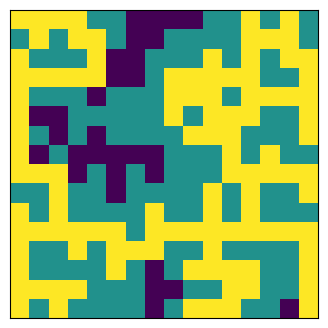

Nodes visited: 117
Elapsed time: 60.19373655319214


'Final path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (11, 4), (11, 5), (12, 5), (12, 6), (12, 7), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (11, 14), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15)]'

In [8]:
#begin timing serial
begin = time.time()
line = dfs(maze)
#end timing serial
stop = time.time()
#display time taken to execute dfs and final path
print("Elapsed time: " + str(stop - begin))
"Final path: " + str(line)

#### Step 6: Display final results
The results of the algorithm are displayed

In [9]:
#copy maze for displaying final path and all visited nodes
final_path = copy.deepcopy(maze)
all_nodes = copy.deepcopy(maze)

Green: Start
Yellow: End
Aqua: Visited
Purple: Empty


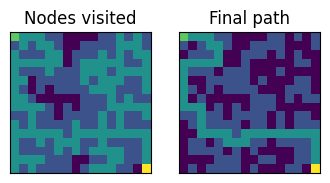

In [10]:
#highlight the start, end and visited nodes in both copied mazes
for a in line:
    final_path[a[0]][a[1]] = 2
final_path[start[0]][start[1]] = 3
final_path[end[0]][end[1]] = 4
for a in explored:
    all_nodes[a[0]][a[1]] = 2
all_nodes[start[0]][start[1]] = 3
all_nodes[end[0]][end[1]] = 4

#display mazes with highlights applied
fig,ax = plt.subplots(1,2,figsize=(display_size, display_size))   
ax[0].pcolormesh(all_nodes)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_aspect('equal')
ax[0].invert_yaxis()
ax[0].set_title("Nodes visited")

ax[1].pcolormesh(final_path)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_aspect('equal')
ax[1].invert_yaxis()
ax[1].set_title("Final path")

#graph legend
print("Green: Start\nYellow: End\nAqua: Visited\nPurple: Empty")